<a href="https://colab.research.google.com/github/azizsayadi1155/Predicting-Urban-Tree-Health/blob/main/Predicting_Urban_Tree_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Urban Tree Health

**Description:** Analyze urban tree data to predict tree health status based on various environmental and geographical factors. This project combines environmental science with data analysis and machine learning.

**Dataset:** https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh/about_data

**Objectives:**

  1.Develop a machine learning model to predict urban tree health with at least 75% accuracy.

  2.Identify the top 5 factors influencing urban tree health.
  

**Project Author:** Aziz Sayadi


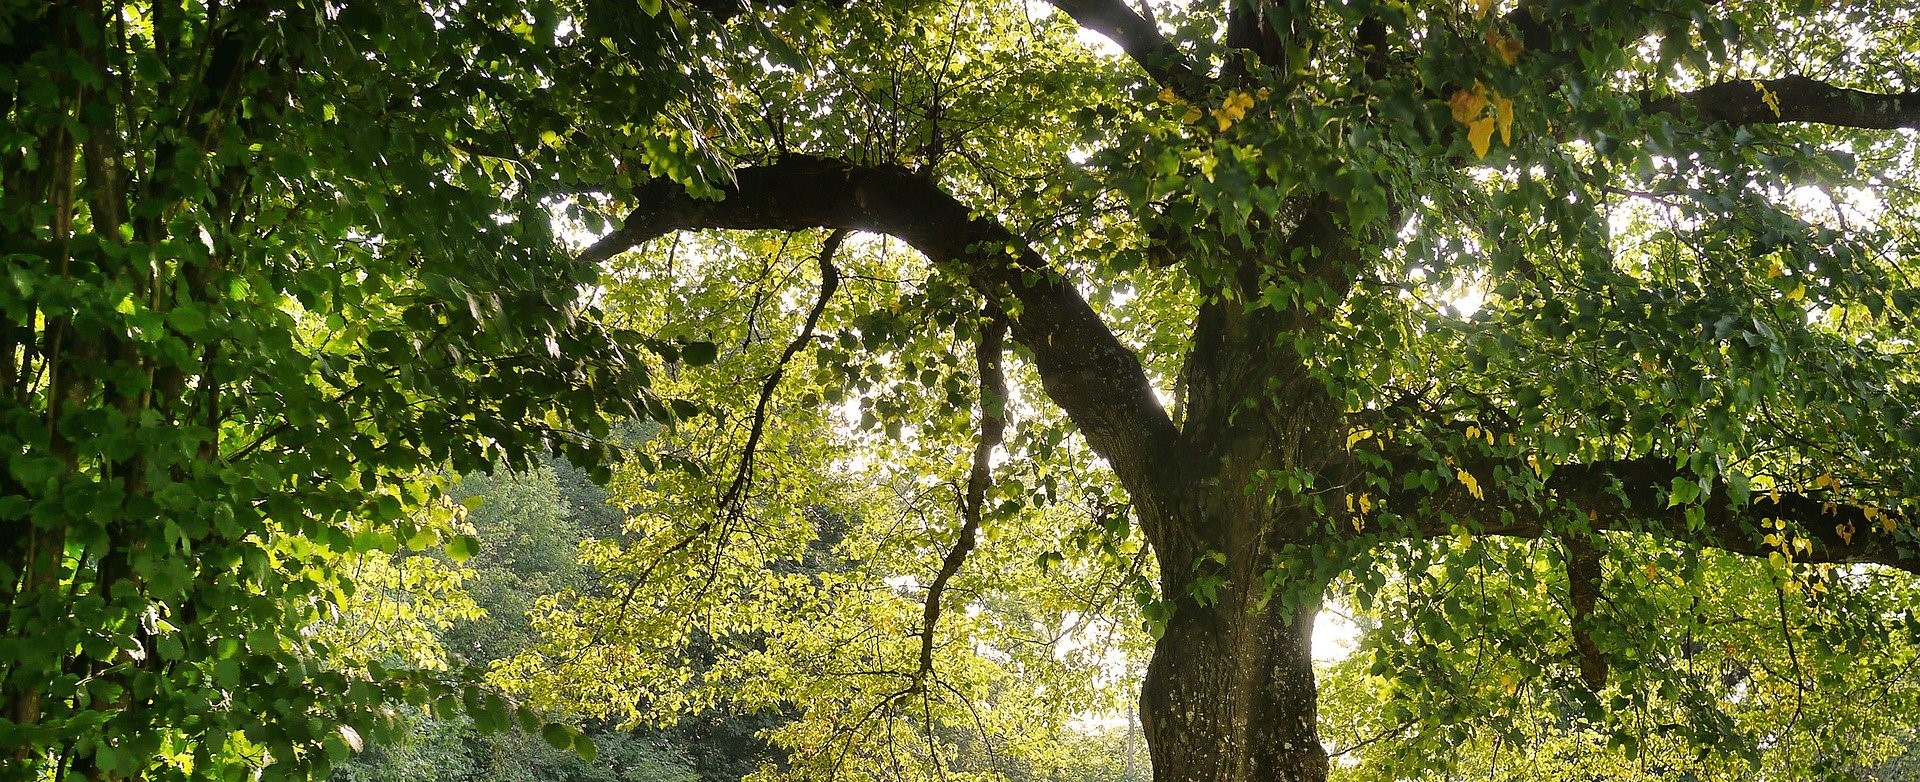

# Importing Libraries

In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [289]:
df = pd.read_csv('/content/data/Tree_Data_20240706.csv')

In [290]:
print("Data Shape:", df.shape)
df.head()

Data Shape: (683788, 45)


,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tree_id           683788 non-null  int64  
 1   block_id          683788 non-null  int64  
 2   created_at        683788 non-null  object 
 3   tree_dbh          683788 non-null  int64  
 4   stump_diam        683788 non-null  int64  
 5   curb_loc          683788 non-null  object 
 6   status            683788 non-null  object 
 7   health            652172 non-null  object 
 8   spc_latin         652169 non-null  object 
 9   spc_common        652169 non-null  object 
 10  steward           164350 non-null  object 
 11  guards            79866 non-null   object 
 12  sidewalk          652172 non-null  object 
 13  user_type         683788 non-null  object 
 14  problems          225844 non-null  object 
 15  root_stone        683788 non-null  object 
 16  root_grate        68

# Date Preprocessing

In [292]:
imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')

In [293]:
imputer = imputer.fit(df[['council district','census tract','bin','bbl']])

In [294]:
df[['council district','census tract','bin','bbl']] = imputer.transform(df[['council district','census tract','bin','bbl']])

In [295]:
df.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tree_id           683788 non-null  int64  
 1   block_id          683788 non-null  int64  
 2   created_at        683788 non-null  object 
 3   tree_dbh          683788 non-null  int64  
 4   stump_diam        683788 non-null  int64  
 5   curb_loc          683788 non-null  object 
 6   status            683788 non-null  object 
 7   health            652172 non-null  object 
 8   spc_latin         652169 non-null  object 
 9   spc_common        652169 non-null  object 
 10  steward           164350 non-null  object 
 11  guards            79866 non-null   object 
 12  sidewalk          652172 non-null  object 
 13  user_type         683788 non-null  object 
 14  problems          225844 non-null  object 
 15  root_stone        683788 non-null  object 
 16  root_grate        68

In [297]:
df.fillna( method ='ffill', inplace = True)

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tree_id           683788 non-null  int64  
 1   block_id          683788 non-null  int64  
 2   created_at        683788 non-null  object 
 3   tree_dbh          683788 non-null  int64  
 4   stump_diam        683788 non-null  int64  
 5   curb_loc          683788 non-null  object 
 6   status            683788 non-null  object 
 7   health            683788 non-null  object 
 8   spc_latin         683788 non-null  object 
 9   spc_common        683788 non-null  object 
 10  steward           683786 non-null  object 
 11  guards            683783 non-null  object 
 12  sidewalk          683788 non-null  object 
 13  user_type         683788 non-null  object 
 14  problems          683787 non-null  object 
 15  root_stone        683788 non-null  object 
 16  root_grate        68

In [299]:
# Still there few records with NaN that didn't affected by ffill, we can simply drop them
df.dropna(inplace=True)

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683783 entries, 5 to 683787
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tree_id           683783 non-null  int64  
 1   block_id          683783 non-null  int64  
 2   created_at        683783 non-null  object 
 3   tree_dbh          683783 non-null  int64  
 4   stump_diam        683783 non-null  int64  
 5   curb_loc          683783 non-null  object 
 6   status            683783 non-null  object 
 7   health            683783 non-null  object 
 8   spc_latin         683783 non-null  object 
 9   spc_common        683783 non-null  object 
 10  steward           683783 non-null  object 
 11  guards            683783 non-null  object 
 12  sidewalk          683783 non-null  object 
 13  user_type         683783 non-null  object 
 14  problems          683783 non-null  object 
 15  root_stone        683783 non-null  object 
 16  root_grate        683783 

In [301]:
df = df.drop_duplicates()

In [302]:
df = df.set_index('tree_id')

In [303]:
df.head()

,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
tree_id,,,,,,,,,,,,,,,,,,,,,
190422,106099,08/30/2015,11,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,...,1014500,New York,40.770046,-73.984950,988418.6997,219825.5227,3.00000,145.000000,1.076229e+06,1.011310e+09
190426,106099,08/30/2015,11,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,...,1014500,New York,40.770210,-73.985338,988311.1900,219885.2785,3.00000,145.000000,1.076229e+06,1.011310e+09
208649,103940,09/07/2015,9,0,OnCurb,Alive,Good,Tilia americana,American linden,1or2,...,1012700,New York,40.762724,-73.987297,987769.1163,217157.8561,3.00000,133.000000,1.086093e+06,1.010410e+09
209610,407443,09/08/2015,6,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,...,5006400,New York,40.596579,-74.076255,963073.1998,156635.5542,30.02733,11957.368422,3.495439e+06,3.413414e+09
192755,207508,08/31/2015,21,0,OffsetFromCurb,Alive,Fair,Platanus x acerifolia,London planetree,1or2,...,3037402,New York,40.586357,-73.969744,992653.7253,152903.6306,47.00000,37402.000000,3.320727e+06,3.072350e+09


In [304]:
df.nunique()

block_id            101390
created_at             483
tree_dbh               146
stump_diam             100
curb_loc                 2
status                   3
health                   3
spc_latin              132
spc_common             132
steward                  3
guards                   3
sidewalk                 2
user_type                3
problems               231
root_stone               2
root_grate               2
root_other               2
trunk_wire               2
trnk_light               2
trnk_other               2
brch_light               2
brch_shoe                2
brch_other               2
address             408699
postcode               191
zip_city                48
community board         59
borocode                 5
borough                  5
cncldist                51
st_assem                65
st_senate               26
nta                    188
nta_name               188
boro_ct               2152
state                    1
latitude            676075
l

In [305]:
drop_cols = ['council district','census tract',
             'bin','bbl','block_id','created_at',
             'user_type','address','zip_city','postcode',
             'state','x_sp','y_sp','borocode','cncldist','st_assem',
             'st_senate','nta','nta_name','boro_ct','community board']
df.drop(columns=drop_cols, inplace=True)

# Exploratory Data Analysis

In [306]:
df.head()

,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,...,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,borough,latitude,longitude
tree_id,,,,,,,,,,,,,,,,,,,,,
190422,11,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,Helpful,NoDamage,...,No,No,No,No,No,No,No,Manhattan,40.770046,-73.984950
190426,11,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,Helpful,NoDamage,...,No,No,No,No,No,No,No,Manhattan,40.770210,-73.985338
208649,9,0,OnCurb,Alive,Good,Tilia americana,American linden,1or2,Helpful,NoDamage,...,No,No,No,No,No,No,No,Manhattan,40.762724,-73.987297
209610,6,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,Helpful,NoDamage,...,No,No,No,No,No,No,No,Staten Island,40.596579,-74.076255
192755,21,0,OffsetFromCurb,Alive,Fair,Platanus x acerifolia,London planetree,1or2,Helpful,NoDamage,...,No,No,No,No,No,No,No,Brooklyn,40.586357,-73.969744


In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683783 entries, 190422 to 200607
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   tree_dbh    683783 non-null  int64  
 1   stump_diam  683783 non-null  int64  
 2   curb_loc    683783 non-null  object 
 3   status      683783 non-null  object 
 4   health      683783 non-null  object 
 5   spc_latin   683783 non-null  object 
 6   spc_common  683783 non-null  object 
 7   steward     683783 non-null  object 
 8   guards      683783 non-null  object 
 9   sidewalk    683783 non-null  object 
 10  problems    683783 non-null  object 
 11  root_stone  683783 non-null  object 
 12  root_grate  683783 non-null  object 
 13  root_other  683783 non-null  object 
 14  trunk_wire  683783 non-null  object 
 15  trnk_light  683783 non-null  object 
 16  trnk_other  683783 non-null  object 
 17  brch_light  683783 non-null  object 
 18  brch_shoe   683783 non-null  object 
 19  br

In [308]:
df.describe()

,tree_dbh,stump_diam,latitude,longitude
count,683783.000000,683783.000000,683783.000000,683783.000000
mean,11.279785,0.432466,40.701261,-73.924060
std,8.723047,3.290253,0.090312,0.123584
min,0.000000,0.000000,40.498466,-74.254965
25%,4.000000,0.000000,40.631928,-73.980501
50%,9.000000,0.000000,40.700612,-73.912911
75%,16.000000,0.000000,40.762228,-73.834909
max,450.000000,140.000000,40.912918,-73.700488


In [309]:
df.isnull().sum()

tree_dbh      0
stump_diam    0
curb_loc      0
status        0
health        0
spc_latin     0
spc_common    0
steward       0
guards        0
sidewalk      0
problems      0
root_stone    0
root_grate    0
root_other    0
trunk_wire    0
trnk_light    0
trnk_other    0
brch_light    0
brch_shoe     0
brch_other    0
borough       0
latitude      0
longitude     0
dtype: int64

In [310]:
df['stump_diam'].value_counts()

stump_diam
0      666129
4         966
5         939
3         779
6         754
        ...  
134         1
109         1
118         1
72          1
120         1
Name: count, Length: 100, dtype: int64

In [311]:
df['tree_dbh'].value_counts()

tree_dbh
4      60372
3      54452
2      41977
5      41642
11     37978
       ...  
142        1
98         1
147        1
154        1
281        1
Name: count, Length: 146, dtype: int64

In [312]:
df.select_dtypes('number').corr()

,tree_dbh,stump_diam,latitude,longitude
tree_dbh,1.000000,-0.169964,-0.034252,0.093162
stump_diam,-0.169964,1.000000,-0.004690,0.036702
latitude,-0.034252,-0.004690,1.000000,0.572288
longitude,0.093162,0.036702,0.572288,1.000000


In [313]:
binary_columns = ['root_stone', 'root_grate',
                  'root_other', 'trunk_wire',
                  'trnk_light', 'trnk_other',
                  'brch_light', 'brch_shoe', 'brch_other']

In [314]:
for col in binary_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [315]:
df['health'] = df['health'].map({'Good': 2, 'Fair': 1, 'Poor': 0})

In [316]:
df['curb_loc'].value_counts()

curb_loc
OnCurb            656891
OffsetFromCurb     26892
Name: count, dtype: int64

In [317]:
df['curb_loc'] = df['curb_loc'].map({'OnCurb': 0, 'OffsetFromCurb': 1})

In [318]:
df['guards'].value_counts()

guards
Helpful    446672
Harmful    161142
Unsure      75969
Name: count, dtype: int64

In [319]:
df['guards'] = df['guards'].map({'Helpful': 1, 'Harmful': -1, 'Unsure': 0})

In [320]:
df['sidewalk'].value_counts()

sidewalk
NoDamage    488302
Damage      195481
Name: count, dtype: int64

In [321]:
df['sidewalk'] = df['sidewalk'].map({'NoDamage': 0, 'Damage': 1})

In [322]:
df['status'].value_counts()

status
Alive    652168
Stump     17654
Dead      13961
Name: count, dtype: int64

In [323]:
df['status'] = df['status'].map({'Alive': 2, 'Stump': 1, 'Dead': 0})

In [324]:
df['steward'].value_counts()

steward
1or2       605336
3or4        72382
4orMore      6065
Name: count, dtype: int64

In [325]:
df['steward'] = df['steward'].map({'1or2': 0, '3or4': 1, '4orMore': 2})

In [326]:
label_encoder = LabelEncoder()
df['spc_latin_encoded'] = label_encoder.fit_transform(df['spc_latin'])
df['spc_common_encoded'] = label_encoder.fit_transform(df['spc_common'])

contingency_table_latin = pd.crosstab(df['spc_latin'], df['health'])
contingency_table_common = pd.crosstab(df['spc_common'], df['health'])

chi2_latin, p_latin, dof_latin, ex_latin = stats.chi2_contingency(contingency_table_latin)
chi2_common, p_common, dof_common, ex_common = stats.chi2_contingency(contingency_table_common)

print(f"Chi-Squared test for spc_latin: chi2 = {chi2_latin}, p-value = {p_latin}")
print(f"Chi-Squared test for spc_common: chi2 = {chi2_common}, p-value = {p_common}")
if p_latin < 0.05:
    print("There is a significant association between spc_latin and health.")
else:
    print("There is no significant association between spc_latin and health.")

if p_common < 0.05:
    print("There is a significant association between spc_common and health.")
else:
    print("There is no significant association between spc_common and health.")

Chi-Squared test for spc_latin: chi2 = 17551.946145052345, p-value = 0.0
Chi-Squared test for spc_common: chi2 = 17551.946145052345, p-value = 0.0
There is a significant association between spc_latin and health.
There is a significant association between spc_common and health.


In [327]:
top_spc_latin = df['spc_latin'].value_counts().nlargest(10)

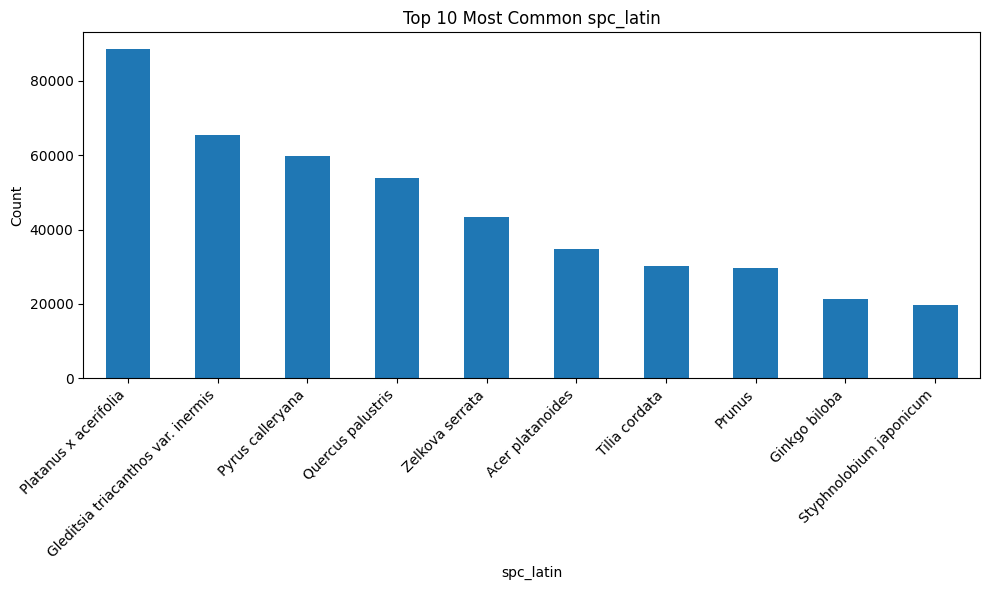

In [328]:
plt.figure(figsize=(10, 6))
top_spc_latin.plot(kind='bar')
plt.title('Top 10 Most Common spc_latin')
plt.xlabel('spc_latin')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [329]:
spc_latin_list = df['spc_latin'].value_counts().nlargest(3).index.to_list()

In [330]:
for spc in spc_latin_list:
    df[f'is_{spc}'] = df['spc_latin'].str.contains(spc).astype(int)

In [331]:
top_spc_common = df['spc_common'].value_counts().nlargest(10)

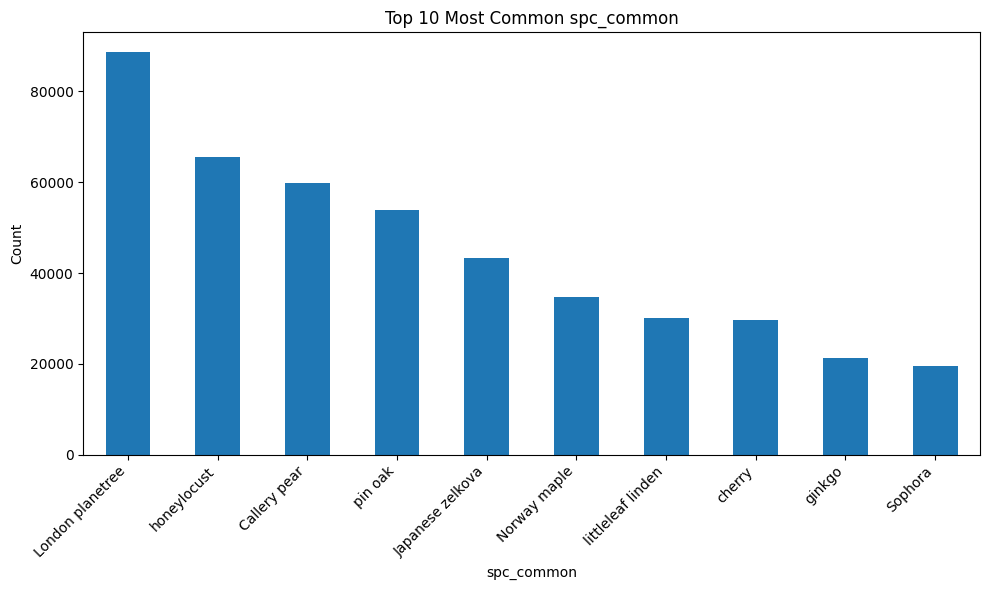

In [332]:
plt.figure(figsize=(10, 6))
top_spc_common.plot(kind='bar')
plt.title('Top 10 Most Common spc_common')
plt.xlabel('spc_common')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [333]:
df.drop(columns=['spc_common_encoded','spc_latin_encoded'],inplace=True)

In [334]:
top_problems = df['problems'].value_counts().nlargest(10)

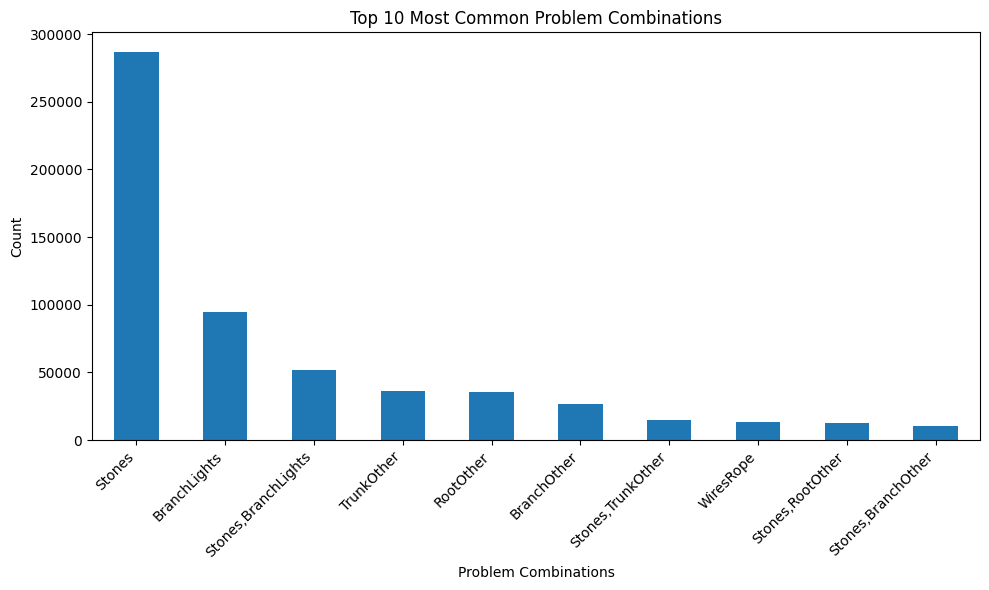

In [335]:
plt.figure(figsize=(10, 6))
top_problems.plot(kind='bar')
plt.title('Top 10 Most Common Problem Combinations')
plt.xlabel('Problem Combinations')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [336]:
problem_types = df['problems'].value_counts().nlargest(3).index.to_list()

In [337]:
for problem in problem_types:
    df[f'has_{problem}'] = df['problems'].str.contains(problem).astype(int)

In [338]:
df = df.select_dtypes(include=[np.number])

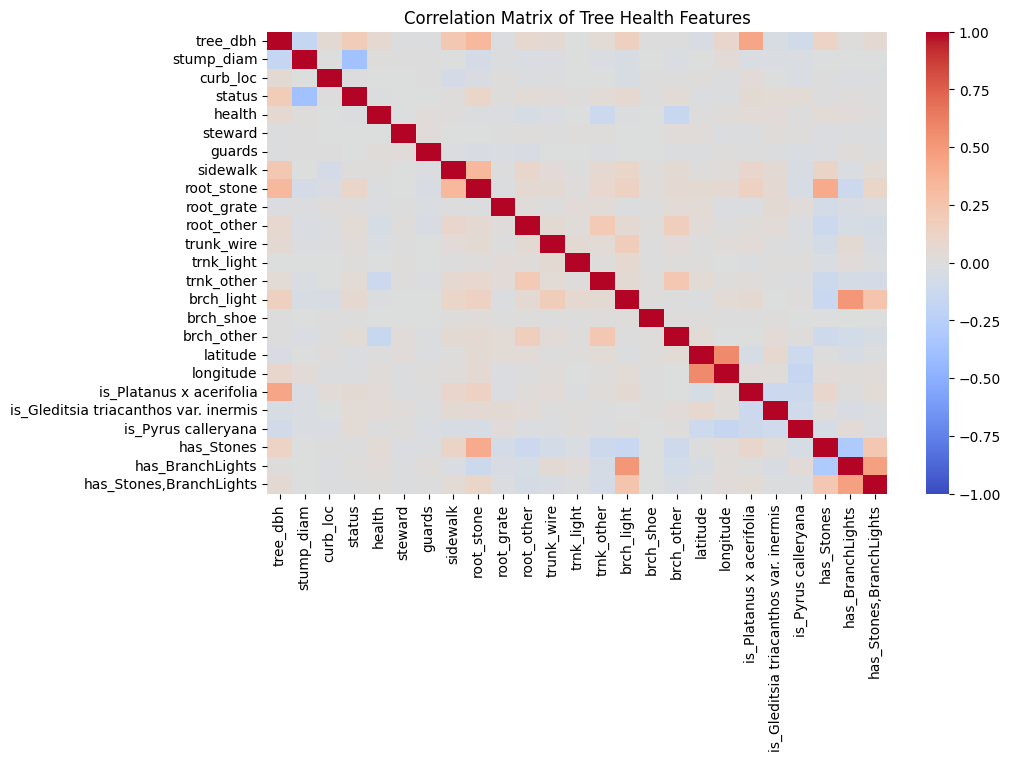

In [339]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Tree Health Features')
plt.show()

In [340]:
health_corr = corr_matrix['health'].sort_values(ascending=False)
print("\nCorrelation with tree health (including problem types):")
print(health_corr)


Correlation with tree health (including problem types):
health                                   1.000000
tree_dbh                                 0.066915
has_Stones                               0.043526
is_Gleditsia triacanthos var. inermis    0.037372
is_Platanus x acerifolia                 0.034413
has_BranchLights                         0.023835
guards                                   0.020077
longitude                                0.015744
has_Stones,BranchLights                  0.015551
stump_diam                               0.013410
sidewalk                                 0.007927
latitude                                 0.007231
is_Pyrus calleryana                      0.005393
curb_loc                                -0.001002
steward                                 -0.004079
brch_shoe                               -0.007540
trnk_light                              -0.007614
root_stone                              -0.013552
brch_light                              -0.

In [341]:
df = df[corr_matrix['health'].abs().sort_values(ascending=False).head(6).index.to_list()]

In [342]:
df.columns

Index(['health', 'brch_other', 'trnk_other', 'tree_dbh', 'root_other',
       'has_Stones'],
      dtype='object')

In [343]:
features = df.drop('health', axis=1)
target = df['health']

In [344]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Modeling

In [352]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

In [353]:
rf_classifier = RandomForestClassifier(random_state=42)

In [354]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluation

In [355]:
y_pred = rf_classifier.predict(X_test)

In [356]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.8127189101837566
Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.01      0.02      5442
           1       0.33      0.01      0.02     20143
           2       0.82      1.00      0.90    111172

    accuracy                           0.81    136757
   macro avg       0.48      0.34      0.31    136757
weighted avg       0.72      0.81      0.73    136757



# Communication

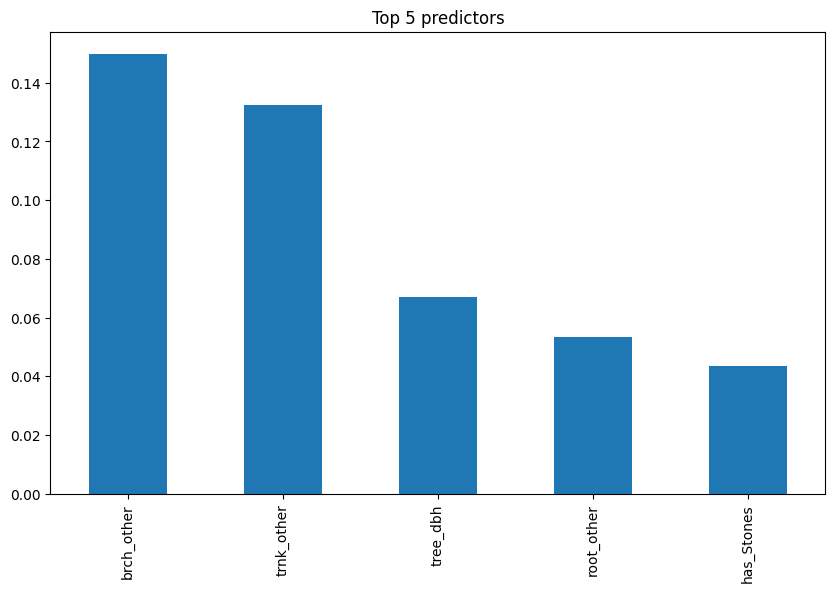

In [367]:
plt.figure(figsize=(10, 6))
corr_matrix['health'].abs().sort_values(ascending=False)[1:6].plot(kind='bar')
plt.title('Top 5 predictors')
plt.show()

1. Branch problems
2. Trunk problems
3. Diameter of the Tree
4. Root problems
5. Has stones